# U - Net
## Problem: 

Seismic data is collected using reflection seismology, or seismic reflection. The method requires a controlled seismic source of energy, such as compressed air or a seismic vibrator, and sensors record the reflection from rock interfaces within the subsurface. The recorded data is then processed to create a 3D view of earth’s interior. Reflection seismology is similar to X-ray, sonar and echolocation.

A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. In theory, the strength of reflection is directly proportional to the difference in the physical properties on either sides of the interface. While seismic images show rock boundaries, they don't say much about the rock themselves; some rocks are easy to identify while some are difficult.

There are several areas of the world where there are vast quantities of salt in the subsurface. One of the challenges of seismic imaging is to identify the part of subsurface which is salt. Salt has characteristics that makes it both simple and hard to identify. Salt density is usually 2.14 g/cc which is lower than most surrounding rocks. The seismic velocity of salt is 4.5 km/sec, which is usually faster than its surrounding rocks. This difference creates a sharp reflection at the salt-sediment interface. Usually salt is an amorphous rock without much internal structure. This means that there is typically not much reflectivity inside the salt, unless there are sediments trapped inside it. The unusually high seismic velocity of salt can create problems with seismic imaging.

### Data
The data is a set of images chosen at various locations chosen at random in the subsurface. The images are 101 x 101 pixels and each pixel is classified as either salt or sediment. In addition to the seismic images, the depth of the imaged location is provided for each image. The goal of the competition is to segment regions that contain salt.

#### Source: 
https://www.kaggle.com/c/tgs-salt-identification-challenge


### Note: 
Accept the terms and download data from the above link

### Aim: 

Implement U-Net neural model architecture in keras to solve this problem.


In this, you are asked to segment salt deposits beneath the Earth’s surface. Given a set of seismic images that are 101 x 101 pixels each and each pixel we need to classify as either salt or sediment. Our goal is to segment regions that contain salt. A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. 

### Broad Steps:

1. Download the dataset
2. Upload to Drive
3. Import from drive to colab
4. Load the images and create training data.
5. Build U-net Model
6. Train your model.
7. Check the validation accuracy and plot sample.

In [1]:
#Importing necessary libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from PIL import Image

Using TensorFlow backend.


In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### 1.Set your project path where you have your data and related files for this lab.

In [0]:
project_path = '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/'

### 2. Set the necessary parameters

## Setup

In [0]:
im_width = 128     #width of your train image
im_height = 128     #hight of your train image
#border =        
path_train = project_path + 'train/'   #Path for your train data

In [0]:
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

CELL_WIDTH = im_width/ WIDTH_CELLS
CELL_HEIGHT = im_height / HEIGHT_CELLS

# 3. Make directory for train and test data at in your project/lab folder.

Hint - use !mkdir function.

In [6]:
os.listdir(project_path)

['R9_External_Lab_Submission File.ipynb',
 'R9_External_Lab_Questions-2.ipynb',
 'data-20190421T070619Z-001.zip',
 'train.zip',
 'R9_External_Lab_Avilasha.ipynb']

In [0]:
os.chdir(project_path)

In [8]:
pwd

'/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab'

In [0]:
#!mkdir train

In [0]:
#!mkdir test

# 4. Extract your train images to the train directory you have just created above. 
train.zip and test.zip files available at your google drive/local system.

As a good practice - Upload or copy the data at your project path folder.

Make sure you are providing the right project_path.

In [0]:
# #For simplicity we have added the required code here.
# from zipfile import ZipFile

# with ZipFile(project_path + 'train.zip', 'r') as zf:
#   zf.extractall('train/')


In [0]:
#The train file have both images and masks with the same names_ids.

In [0]:
mylist = os.listdir(project_path + 'train')

In [14]:
mylist

['images', 'masks']

In [0]:
image_path = os.listdir(project_path + 'train/images')

In [0]:
mask_path = os.listdir(project_path + 'train/masks')

In [17]:
# Length of Image Path
len(image_path)

4000

In [18]:
# Length of Mask Path
len(mask_path)

4000

### 5. Get the list of names of images and masks and name the list imagelist and masklist.

Hint - Use os.listdir() funtions.

In [0]:
masklist = []
imagelist = []

for filename in image_path:
  imagelist.append(filename)
  


In [0]:
for filename in mask_path:
  masklist.append(filename)

In [21]:
#Test your list names by printing some of the names as given below.
print(imagelist[-1])
print(masklist[-1])
print(imagelist[10])
print(masklist[10])

7cc53fe88b.png
7cc53fe88b.png
de08c5a3b7.png
de08c5a3b7.png


# 6. Read and test your images and respective masks.

Hint -

import  matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread('path of image'))

plt.imshow(cv2.imread('path of mask'))


In [0]:
import matplotlib.pyplot as plt

import cv2

In [0]:
image1 =  os.path.join(project_path + 'train/images/'+image_path[1]) # create path for image1

In [0]:
mask1 = os.path.join(project_path +'train/masks/'+mask_path[1]) #create path for mask1

In [25]:
os.path.isfile(mask1) #check if file is created

True

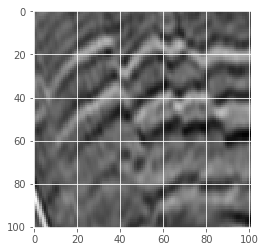

In [26]:
plt.imshow(cv2.imread(image1)) #display image 

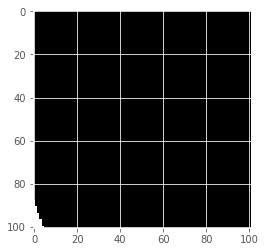

In [27]:
plt.imshow(cv2.imread(mask1)) #display mask



# 7. Create your training data.

Hints - 

image_path = os.path.join(project_path +'path of your image directory' +n )

mask_path = os.path.join(project_path +'path of your mask directory'+n )

In [28]:
# Get and resize train images and masks
def get_data():
    X = np.zeros(((len(imagelist), im_height, im_width, 1)), dtype=np.float32) # Create an array for image
    y = np.zeros(((len(masklist), im_height, im_width, 1)), dtype=np.float32) #Create an array for mask
    
    for n in imagelist:
      k = imagelist.index(n)
      ##Add image_path
      image_path =  os.path.join(project_path+'train/images/'+n)
      img = Image.open(image_path)
      img = img.resize((im_width,im_height))
      img = np.reshape(img.convert('L'),(128,128,1))
      X[k] = img
      
      ##Add mask_path
      m = masklist[k]
      mask_path =   os.path.join(project_path+'train/masks/'+m)
      msk = Image.open(mask_path)
      msk = msk.resize((im_width,im_height))
      msk = np.reshape(msk.convert('L'),(128,128,1))
      y[k] = msk
      
      #normalize images
      X[k, ...,0] = img.squeeze() /255
      y[k] = msk/255
    print('Done!')
    return X, y
    
    
X,y = get_data()

Done!


In [29]:
X.shape

(4000, 128, 128, 1)

In [30]:
y.shape

(4000, 128, 128, 1)

In [0]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

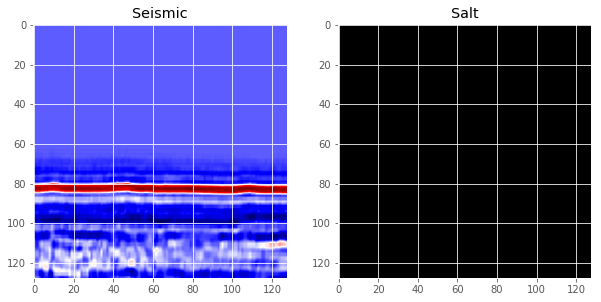

In [32]:
## Test your data whether it looks fine - Random check
import random 
# Check if training data looks all right
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Seismic')

ax[1].imshow(y_train[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('Salt');




### 8. Define loss and dice_coeff function.

In [0]:
def dice_coeff(y_true,y_pred):
  numerator = 2* tf.reduce.sum(y_true*y_pred)
  denominator = tf.reduce.sum(y_true +y_pred)
  
  return numerator/(denominator +tf.keras.backend.epsilon())

In [0]:
def loss(y_true,y_pred):
  return binary_crossentropy(y_true,y_pred) - tf.log(dice_coeff(y_true,y_pred) +tf.keras.backend,epsilon())
  

### 9. Build and compile UNet Model for your data.

Hint - 
You can install and use segmentation models from this github repository.

#Install segmentation models

!pip install git+https://github.com/qubvel/segmentation_models

In [36]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-6k5yxq_9
    100% |████████████████████████████████| 81kB 9.6MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-ik72pc4v/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [37]:
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

/usr/local/lib/python3.6/dist-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [0]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

In [0]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [40]:
X_train.shape

(3400, 128, 128, 1)

In [41]:
X_valid.shape

(600, 128, 128, 1)

In [42]:
y_valid.shape

(600, 128, 128, 1)

In [0]:
from keras.layers import Reshape
N = X_train.shape[-1]

In [50]:
base_model = Unet(backbone_name='resnet34', encoder_weights=None, input_shape=(None, None, 1))

inp = Input(shape=(128, 128, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)
x = Conv2D(1, kernel_size=2,strides=2, activation="sigmoid")(out)
x = Conv2D(1, kernel_size=2,strides=2, activation="sigmoid")(x)
x = Conv2D(1, kernel_size=2,strides=2, activation="sigmoid")(x)
#x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

model = Model(inp, x, name=base_model.name)
#compile your model by adding the parameters like optimizer, loss and metrics.


ValueError: ignored

In [0]:
#Get the summary of your model
model.summary()


### 10. Fit your model using model.fit function.
Hint - As it might take long time to run. Run it for only 1 or 2 epochs.

In [0]:
# Load your model weights.
model.load_weights('model-tgs-salt.h5')

### 11.Predict on val set using model.predict funtion and store in preds_val variable.



In [0]:
#Get the threshold predictions to look at refined results.
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [0]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

In [0]:
# Check if valid data looks all right
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=15)

If you are getting good results- Congratulations.
If you are not, try to explore what might be the reason.

# Text generation using a RNN

Given a sequence of words from this data, train a model to predict the next word in the sequence. Longer sequences of text can be generated by calling the model repeatedly.

**Mount your Google Drive**

### Import Keras and other libraries

In [0]:
import glob

from sklearn.utils import shuffle
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam
from keras import backend

## Download data
Data is collected from http://www.gutenberg.org

Go to this link to download the collected data
https://github.com/partoftheorigin/text-generation-datasets/tree/master/oscar_wilde

### Load the Oscar Wilde dataset

Store all the ".txt" file names in a list

In [0]:
osclist = glob.glob("/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/*.txt")

In [57]:
osclist

['/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/Vera or, The Nihilists.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Picture of Dorian Gray.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Soul of Man.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Duchess of Padua.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Importance of Being Earnest.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Happy Prince and other tales.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Ballad of Reading Gaol.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/Oscar Wilde/The Canterville Ghost.txt',
 '/content/drive/My Drive/Colab Notebooks/AIML/Residenc

### Read the data

Read contents of every file from the list and append the text in a new list

In [0]:
osctext = []
oscrange = []
for file in osclist:
  osct = open(file,'r')
  start = len(osctext)
  osctext.append(osct.read())
  end = len(osctext)
  oscrange.append({"start":start,"end":end,"name" :file.rsplit("/",1)[-1]})
  

In [59]:
osctext[1]

'\ufeffThe Project Gutenberg EBook of The Picture of Dorian Gray, by Oscar Wilde\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Picture of Dorian Gray\n\nAuthor: Oscar Wilde\n\nRelease Date: October 1, 2008 [EBook #26740]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY ***\n\n\n\n\nProduced by David Clarke, Chuck Greif and the Online\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\nTHE PICTURE OF DORIAN GRAY\n\nBY\n\nOSCAR WILDE\n\nLONDON: SIMPKIN, MARSHALL,\n\nHAMILTON, KENT & CO., LTD.\n\nPARIS\n\nON SALE AT YE OLD PARIS BOOKE SHOPPE\n\n11 RUE DE CHÂTEAUDUN\n\n_Registered at Stationers\' Hall and protected\nunder the Copyright Law Act.\n\nFirst published in complete book form in 1891 by\nMessrs

In [60]:
oscrange[1]

{'end': 2, 'name': 'The Picture of Dorian Gray.txt', 'start': 1}

## Process the text
Initialize and fit the tokenizer

In [0]:
tokenizer = Tokenizer(lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(osctext)

### Vectorize the text

Before training, we need to map strings to a numerical representation. Create two lookup tables: one mapping words to numbers, and another for numbers to words.

In [0]:
word_idx = tokenizer.word_index
idx_word = tokenizer.index_word

Get the word count for every word and also get the total number of words.

In [0]:
word_counts = tokenizer.word_counts
num_words = len(word_idx) + 1

In [64]:
num_words

14788

Convert text to sequence of numbers

In [0]:
sequences = tokenizer.texts_to_sequences(osctext)

### Generate Features and Labels

In [0]:
features = []
labels = []
training_length = 50
for seq in sequences:
  for i in range(training_length,training_length+300):
    extract = seq[i-training_length:i-training_length +20]
    features.append(extract[:-1])
    labels.append(extract[-1])

In [67]:
len(features)

3000

In [68]:
len(labels)

3000

### The prediction task

Given a word, or a sequence of words, what is the most probable next word? This is the task we're training the model to perform. The input to the model will be a sequence of words, and we train the model to predict the output—the following word at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the words computed until this moment, what is the next word?

### Generate training and testing data

In [0]:

features,labels = shuffle(features,labels,random_state=1)

#Decide the number of samples for training 
train_end = int(.7 *len(labels))

train_features = np.array(features[:train_end])
valid_features = np.array(features[train_end:])

train_labels = labels[:train_end]
valid_labels = labels[train_end:]


In [0]:
X_train , X_valid = np.array(train_features), np.array(valid_features) # convert to arrays

In [0]:
#using int8 for memory saving 
y_train = np.zeros((len(train_labels),num_words),dtype=np.int8)
y_valid = np.zeros((len(valid_labels),num_words),dtype=np.int8)

In [0]:
#One hot encoding of labels
for example_index ,word_index in enumerate(train_labels):
  y_train[example_index,word_index] = 1
 

In [0]:
for example_index,word_index in enumerate(valid_labels):
  y_valid[example_index,word_index] = 1 

This is just to check the features and labels

In [74]:
for i , sequence in enumerate(X_train[:2]):
  text = []
  for idx in sequence:
      text.append(idx_word[idx])
    
  print('Features:' + ' '.join(text) + '\n')
  print('Label' + idx_word[np.argmax(y_train[i])] + '\n')

Features:are red and blood and wine were on his hands when they found him with the dead the poor

Labeldead

Features:me whispered low that fellow's got to swing dear christ the very prison walls suddenly seemed to reel and

Labelthe



## Build The Model

Use `keras.Sequential` to define the model. For this simple example three layers are used to define our model:

* `keras.layers.Embedding`: The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
* `keras.layers.LSTM`: A type of RNN with size `units=rnn_units` (You can also use a GRU layer here.)
* `keras.layers.Dense`: The output layer, with `num_words` outputs.

In [0]:
model = Sequential()

#embedding Layer 
model.add(
    Embedding(
    input_dim= len(word_idx) +1 ,
    output_dim = 100,
    weights = None,
    trainable = True))

In [76]:
#LSTM layer
model.add(
      LSTM(64,return_sequences= False ,dropout= .1,recurrent_dropout=.1))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#FCN
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(num_words,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

For each word the model looks up the embedding, runs the LSTM one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-liklihood of the next word.

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1478800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14788)             961220    
Total params: 2,486,420
Trainable params: 2,486,420
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [80]:
hist = model.fit(X_train,y_train,epochs = 10,batch_size = 64,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2100/2100 [==============================] - 13s 6ms/step - loss: 9.4758 - acc: 0.0619
Epoch 2/10
2100/2100 [==============================] - 1s 586us/step - loss: 7.0985 - acc: 0.0733
Epoch 3/10
2100/2100 [==============================] - 1s 588us/step - loss: 6.4544 - acc: 0.0729
Epoch 4/10
2100/2100 [==============================] - 1s 595us/step - loss: 6.2899 - acc: 0.0719
Epoch 5/10
2100/2100 [==============================] - 1s 603us/step - loss: 6.1470 - acc: 0.0729
Epoch 6/10
2100/2100 [==============================] - 1s 581us/step - loss: 6.0589 - acc: 0.0729
Epoch 7/10
2100/2100 [==============================] - 1s 579us/step - loss: 5.9700 - acc: 0.0729
Epoch 8/10
2100/2100 [==============================] - 1s 594us/step - loss: 5.8842 - acc: 0.0719
Epoch 9/10
2100/2100 [==============================] - 1s 600us/step - loss: 5.8263 - acc: 0.0729
Epoch 10/10
2100/2100 [==============================] - 1s 57

### Save Model

In [81]:
pwd

'/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab'

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/model_10ep.h5')

## If you have already trained the model and saved it, you can load a pretrained model

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/AIML/Residency 9/R9_External Lab/model_10ep.h5')

### Note: After loading the model run  model.fit()  to continue training form there, if required.

In [86]:
model.fit(X_train, y_train, batch_size=60, epochs=20)

Epoch 1/20
2100/2100 [==============================] - 2s 1ms/step - loss: 5.7616 - acc: 0.0700
Epoch 2/20
2100/2100 [==============================] - 1s 649us/step - loss: 5.7057 - acc: 0.0695
Epoch 3/20
2100/2100 [==============================] - 1s 643us/step - loss: 5.6984 - acc: 0.0714
Epoch 4/20
2100/2100 [==============================] - 1s 637us/step - loss: 5.6533 - acc: 0.0710
Epoch 5/20
2100/2100 [==============================] - 1s 643us/step - loss: 5.6075 - acc: 0.0686
Epoch 6/20
2100/2100 [==============================] - 1s 659us/step - loss: 5.5869 - acc: 0.0724
Epoch 7/20
2100/2100 [==============================] - 1s 706us/step - loss: 5.5655 - acc: 0.0714
Epoch 8/20
2100/2100 [==============================] - 1s 704us/step - loss: 5.5321 - acc: 0.0724
Epoch 9/20
2100/2100 [==============================] - 1s 695us/step - loss: 5.5014 - acc: 0.0724
Epoch 10/20
2100/2100 [==============================] - 1s 704us/step - loss: 5.4456 - acc: 0.0757
Epoch 11/20

## Evaluation

In [87]:
print(model.evaluate(X_train,y_train,batch_size=20))

2100/2100 [==============================] - 3s 2ms/step
[4.774365461440313, 0.09238095428972017]


In [88]:
print(model.evaluate(X_valid,y_valid,batch_size=20))

900/900 [==============================] - 1s 619us/step
[7.916761970520019, 0.09444444643126594]


## Generate text

In [0]:
seed_length = 50
new_words = 50
diversity =1 
n_gen =1 


In [0]:
import random

In [91]:
#choose a random sequence 
seq = random.choice(sequences)
print ("Seq :%r \n Len seq :%d" %(seq,len(seq)))

Seq :[2627, 46, 42, 332, 2, 1, 314, 2, 84, 162, 33, 694, 668, 30, 332, 9, 15, 1, 178, 2, 455, 816, 21, 40, 892, 3, 13, 370, 40, 1465, 1046, 8, 86, 257, 11, 142, 11, 135, 23, 1192, 178, 11, 226, 1, 159, 2, 1, 46, 42, 234, 957, 13, 30, 332, 23, 743, 21, 400, 42, 347, 1538, 1, 314, 2, 84, 162, 1466, 694, 668, 1854, 837, 4542, 77, 5164, 332, 4543, 1121, 540, 798, 2, 30, 46, 42, 332, 1, 314, 2, 84, 162, 864, 33, 2296, 6572, 5306, 6573, 3, 1, 743, 710, 3866, 3472, 21, 551, 400, 4399, 709, 1, 314, 2, 84, 162, 33, 694, 668, 417, 3568, 3245, 3246, 3569, 1597, 2766, 791, 27, 4544, 21, 1565, 163, 791, 8954, 8955, 2647, 3489, 281, 8956, 1498, 21, 8957, 1112, 3, 1437, 226, 1, 213, 336, 457, 155, 1628, 7, 1493, 509, 252, 7, 4545, 33, 2513, 1898, 2137, 1597, 417, 155, 996, 7, 30, 832, 3965, 4546, 6574, 2982, 4546, 3915, 4546, 2982, 5307, 6575, 5308, 4542, 5308, 93, 1, 6576, 719, 27, 399, 5309, 3, 6577, 608, 2, 84, 162, 21, 1, 329, 2, 30, 415, 1733, 1, 3247, 1, 313, 9, 1, 5310, 2, 225, 115, 4, 2514, 1

In [0]:
#choose a random starting point 
seed_idx = random.randint(0,len(seq)- seed_length -10)
end_idx = seed_idx + seed_length

In [93]:
gen_list = []

for n in range(n_gen):
    # Extract the seed sequence
    seed = seq[seed_idx:end_idx]
    original_sequence = [idx_word[i] for i in seed]
    generated = seed[:] + ['#']

    # Find the actual entire sequence
    actual = generated[:] + seq[end_idx:end_idx + new_words]
        
    # Keep adding new words
    for i in range(new_words):

        # Make a prediction from the seed
        preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(np.float64)

        # Diversify
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)

        # Softmax
        preds = exp_preds / sum(exp_preds)

        # Choose the next word
        probas = np.random.multinomial(1, preds, 1)[0]

        next_idx = np.argmax(probas)

        # New seed adds on old word
        #             seed = seed[1:] + [next_idx]
        seed += [next_idx]
        generated.append(next_idx)
    # Showing generated and actual abstract
    n = []

    for i in generated:
        n.append(idx_word.get(i, '< --- >'))

    gen_list.append(n)

a = []

for i in actual:
    a.append(idx_word.get(i, '< --- >'))

a = a[seed_length:]

gen_list = [gen[seed_length:seed_length + len(a)] for gen in gen_list]

print('Original Sequence: \n'+' '.join(original_sequence))
print("\n")
# print(gen_list)
print('Generated Sequence: \n'+' '.join(gen_list[0][1:]))
# print(a) 
  
  

Original Sequence: 
strong face and your coal black hair and this young adonis who looks as if he was made out of ivory and rose leaves why my dear basil he is a narcissus and you well of course you have an intellectual expression and all that but beauty real beauty ends


Generated Sequence: 
dorian establishment of with beautiful messrs then you produced gutenberg this at h project the title the other edition the incomparable gilded zip on dislike gilded character character the two guido has the third place on the 1914 experimental miss peter chasuble gutenberg darwin of nor creator the domain character
